<a href="https://colab.research.google.com/github/johntorfi/MLProjectTelecom/blob/main/MLprojectTelecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Telcom Churn EDA



<h1><strong>Telecom Churn analysis</strong></h1>


<h3><strong>Project Overview</strong></h3>

The objective of this project is to analyze the churn rate of Orange S.A., a French telecom company, and identify the factors contributing to customer churn. We will use the Orange Telecom's Churn Dataset, which includes cleaned customer activity data and a churn label indicating whether a customer canceled their subscription.
<h3><strong>Problem Statement</strong></h3>
The problem we aim to address is the customer churn rate in Orange Telecom. Customer churn refers to the number of customers who discontinue their subscription within a specific period. Our objective is to analyze the data and uncover the key factors responsible for customer churn. Based on our findings, we will provide recommendations to enhance customer retention.
<h3><strong> business objectives</strong></h3>

1.Identify key factors contributing to customer churn: By analyzing the customer activity data, we will look for patterns and correlations that indicate why customers are canceling their subscriptions. This understanding will help Orange Telecom take proactive measures to reduce churn.



2.Provide recommendations for customer retention: Based on our analysis results, we will propose actionable recommendations to Orange Telecom for retaining valuable customers. These recommendations may include targeted marketing campaigns, improved customer service, or service enhancements to address identified pain points.


In [ ]:
#import  required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
%matplotlib inline

<h4><strong>Loading the dataset</h4>

In [ ]:
telco_df = pd.read_csv('/content/drive/MyDrive/CustomerChurn.csv')


<h4><strong>General information about the dataset</h4>

In [ ]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco_df.shape

(7043, 21)

In [ ]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
telco_df.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Check for duplicate Values
telco_df.duplicated().sum()

0

In [ ]:
# Missing Values
telco_df.isnull().sum()
     

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Check for unique Values
telco_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

The categorical nature of SeniorCitizen renders the distribution of 25%, 50%, and 75% improper for analysis.

A significant proportion of customers, approximately 75%, exhibit a tenure duration of less than 55 months.

On average, customers incur monthly charges amounting to USD 64.76. However, it is worth noting that approximately 25% of customers pay an amount exceeding USD 89.85 per month.

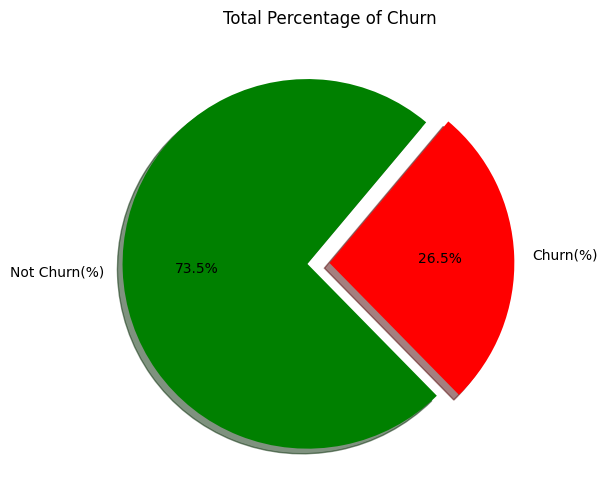

In [ ]:
# Calculate the value counts for the 'Churn' column
churn_counts = telco_df['Churn'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(churn_counts, 
        labels=['Not Churn(%)', 'Churn(%)'],
        colors=['green', 'red'],
        autopct="%1.1f%%", 
        startangle=50, 
        shadow=True, 
        explode=[0.12, 0])

# Set title and axis labels
plt.title('Total Percentage of Churn')

# Display the chart
plt.show()

In [ ]:
telco_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
tel_df = telco_df.copy()



Total Charges should be numeric amount. Let's convert it to numerical data type


In [ ]:
tel_df.TotalCharges = pd.to_numeric(tel_df.TotalCharges, errors='coerce')



In [ ]:
tel_df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
tel_df.loc[tel_df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No




Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.


In [ ]:
#Removing missing values 
tel_df.dropna(how = 'any', inplace = True)


In [ ]:
from tabulate import tabulate

# Define the features that we want to compare with churn
features = ['MonthlyCharges', 'TotalCharges','tenure']

# Calculate the average value for each feature and churn using pivot_table
table_df = tel_df.pivot_table(index='Churn', values=features, aggfunc='mean').reset_index()

# Rename the columns with 'perc_' prefix
table_df.columns = ['Churn'] + ['perc_' + col for col in table_df.columns[1:]]

# Generate the table using tabulate
table = tabulate(table_df, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the table
print(table)

╒═════════╤═══════════════════════╤═════════════════════╤═══════════════╕
│ Churn   │   perc_MonthlyCharges │   perc_TotalCharges │   perc_tenure │
╞═════════╪═══════════════════════╪═════════════════════╪═══════════════╡
│ No      │               61.3074 │             2555.34 │       37.65   │
├─────────┼───────────────────────┼─────────────────────┼───────────────┤
│ Yes     │               74.4413 │             1531.8  │       17.9791 │
╘═════════╧═══════════════════════╧═════════════════════╧═══════════════╛


From the table, we can make the following insights:

Monthly Charges: The average monthly charges for customers who churned (Yes) are higher (74.4413) compared to those who did not churn (No) with an average of 61.3074. This suggests that higher monthly charges may contribute to customer churn.

Total Charges: The average total charges for customers who churned (Yes) are lower (1531.8) compared to those who did not churn (No) with an average of 2555.34. This indicates that customers with lower total charges are more likely to churn.

Tenure: The average tenure (in months) for customers who churned (Yes) is significantly lower (17.9791) compared to those who did not churn (No) with an average of 37.65. This implies that customers with shorter tenure are more prone to churn.
The relationship between tenure and total charges can be explained by the fact that customers with lower total charges may have shorter durations of tenure. This means they may have been customers for a relatively shorter period of time compared to those with higher total charges.

It is possible that customers with lower total charges are more likely to churn early in their tenure, leading to a lower average tenure for that group. On the other hand, customers with higher total charges may have been with the company for a longer duration, resulting in a higher average tenure for customers who did not churn.



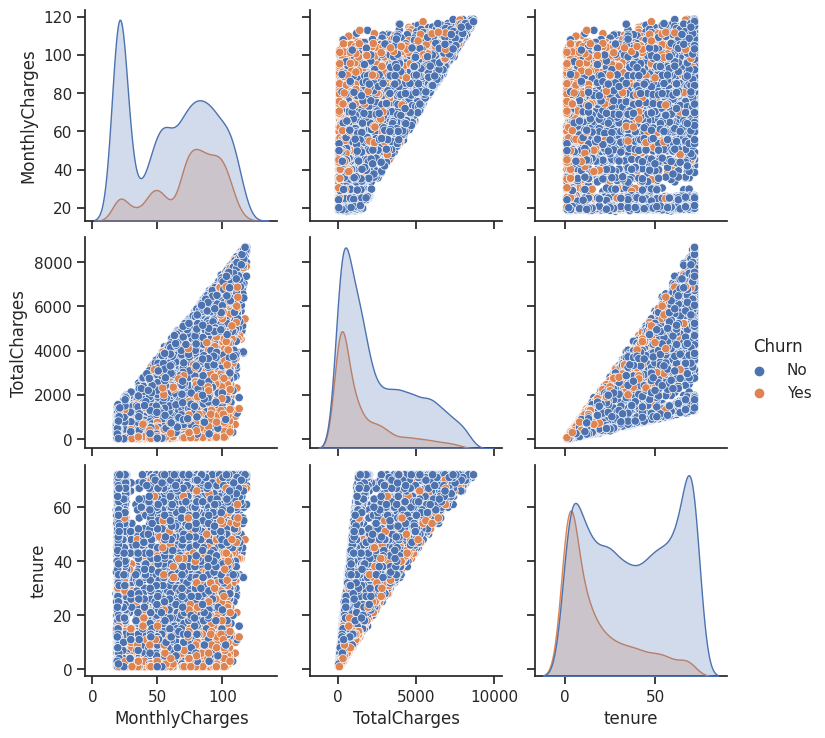

In [ ]:

# Set the style of the plot
sns.set(style="ticks")

# Create the plot
sns.pairplot(data=tel_df, vars=['MonthlyCharges', 'TotalCharges', 'tenure'],hue='Churn')

# Display the plot
plt.show()




The above plot also confirms what has been discovered in the table.


 Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [ ]:
# Get the max tenure
print(tel_df['tenure'].max()) #72

72


In [ ]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

tel_df['tenure_group'] = pd.cut(tel_df.tenure, range(1, 80, 12), right=False, labels=labels)



In [ ]:
tel_df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [ ]:
#drop column customerID and tenure
tel_df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
tel_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12



Data Exploration

1. Plot distibution of individual predictors by churn


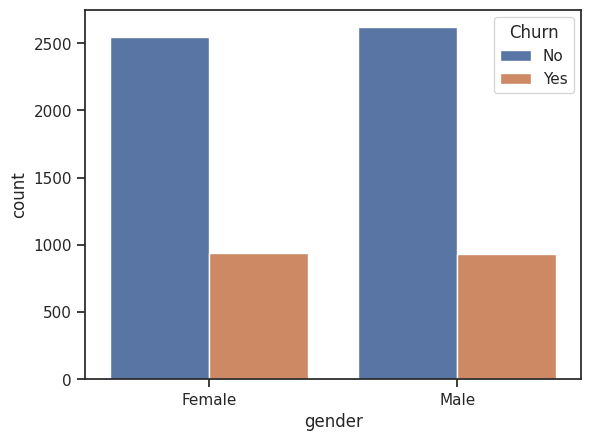

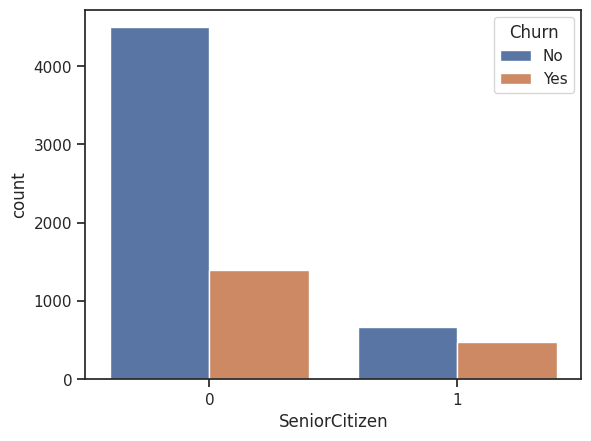

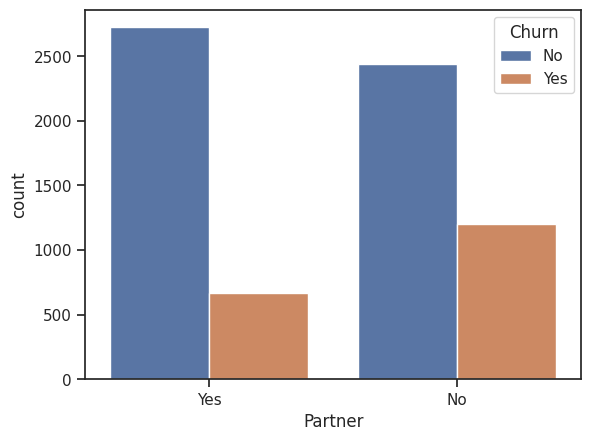

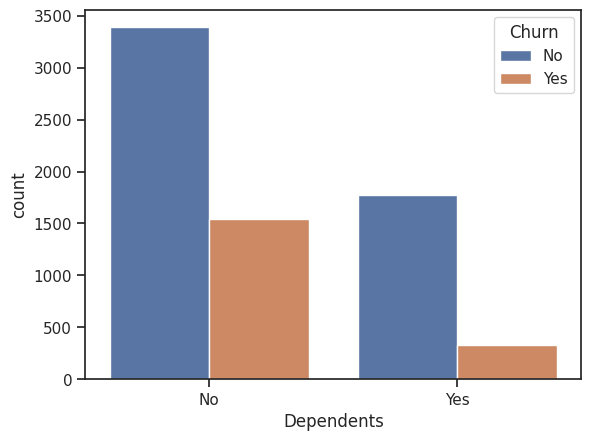

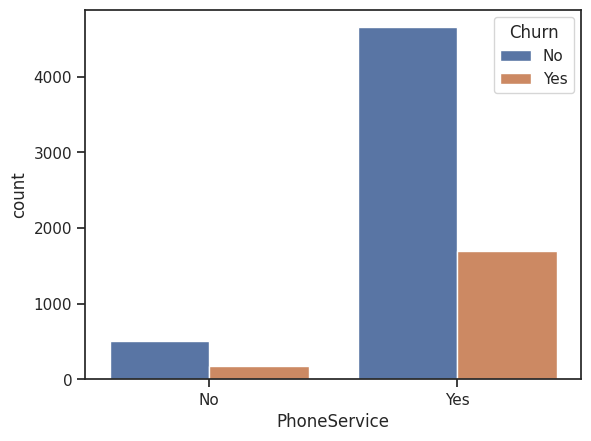

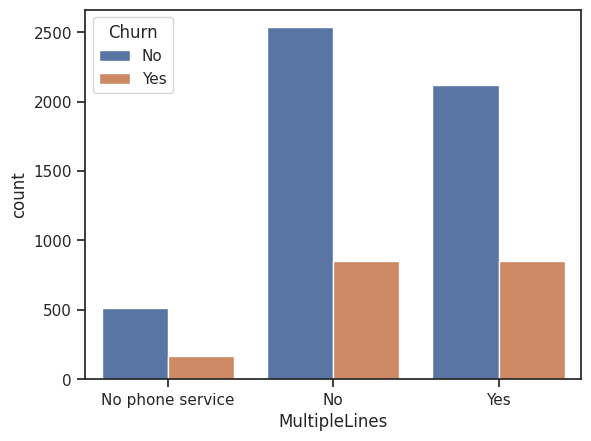

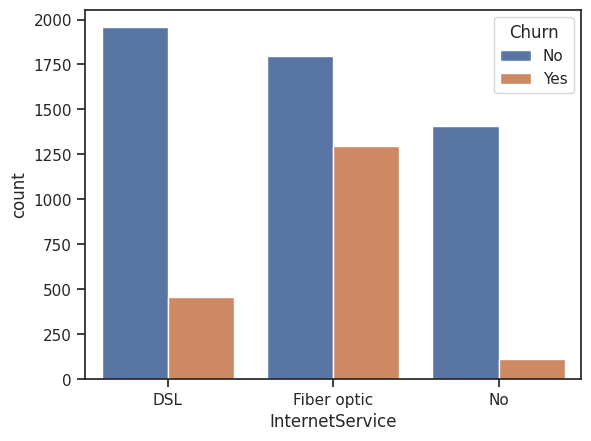

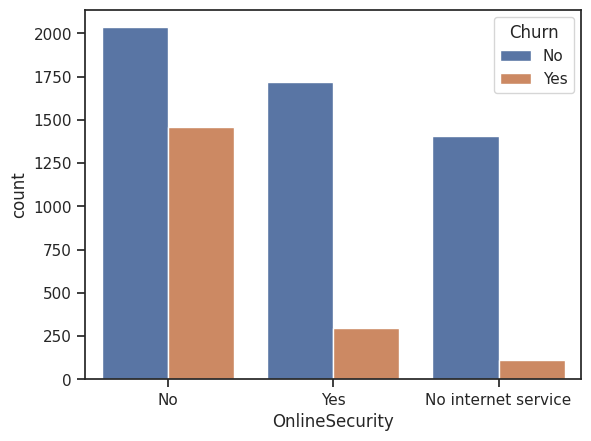

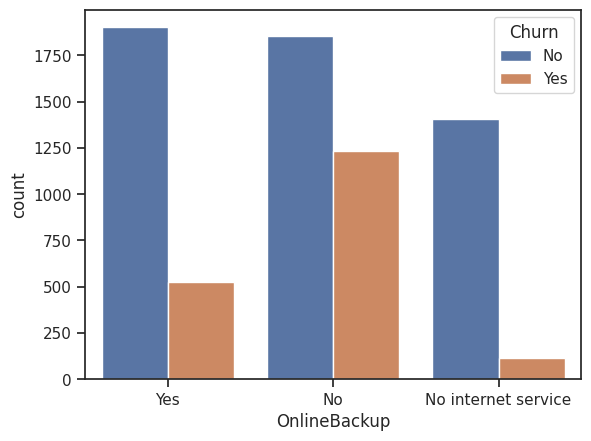

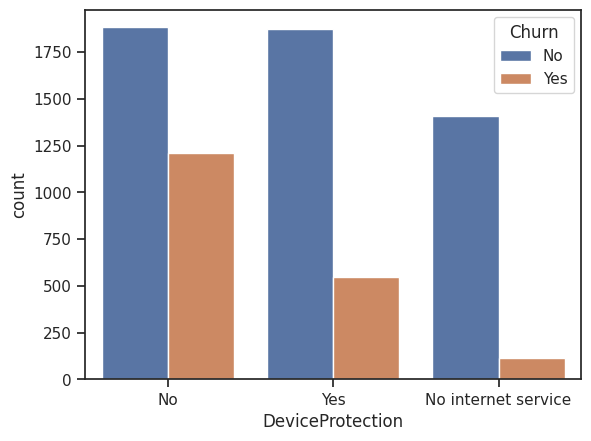

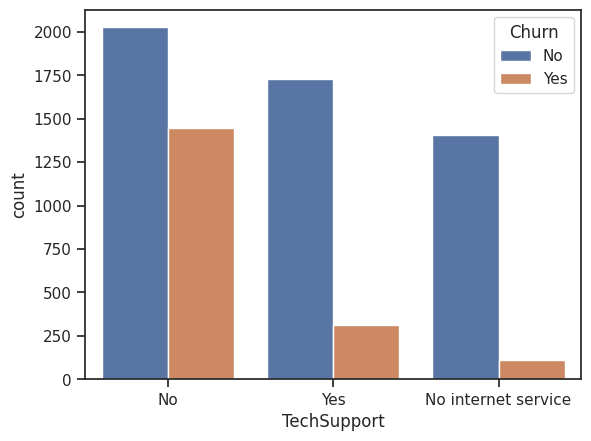

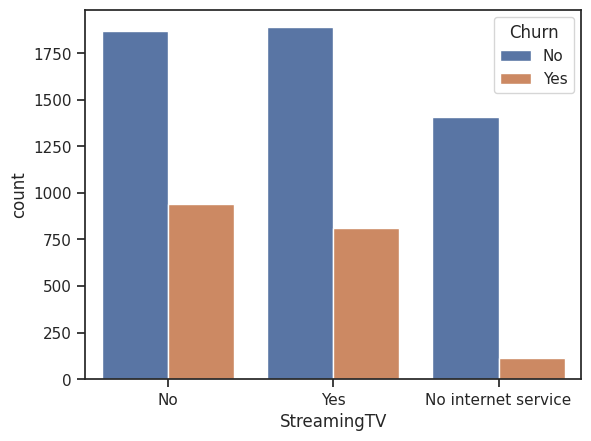

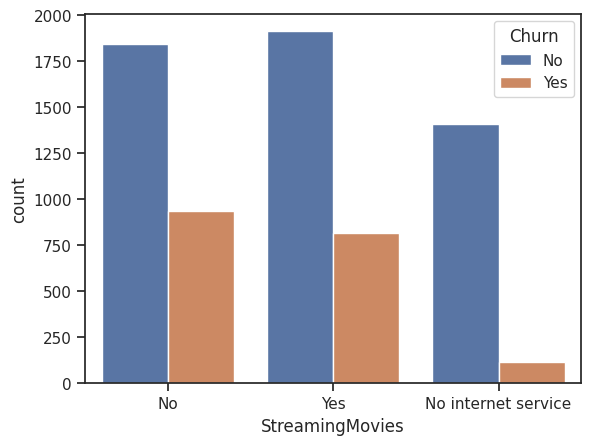

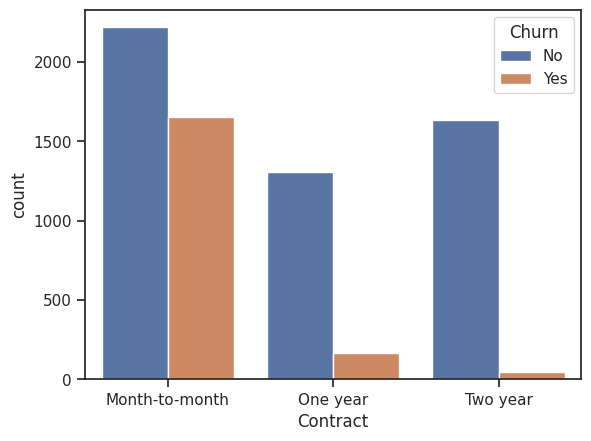

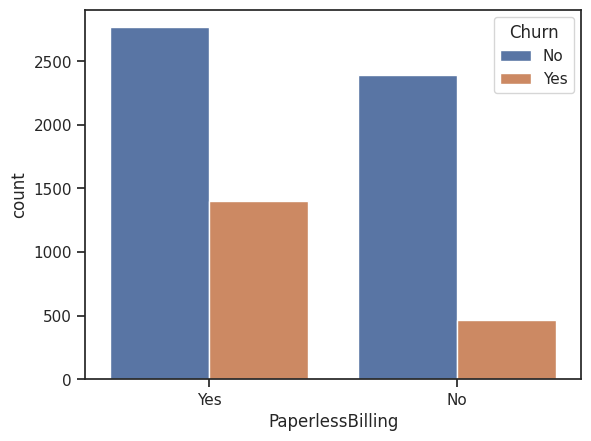

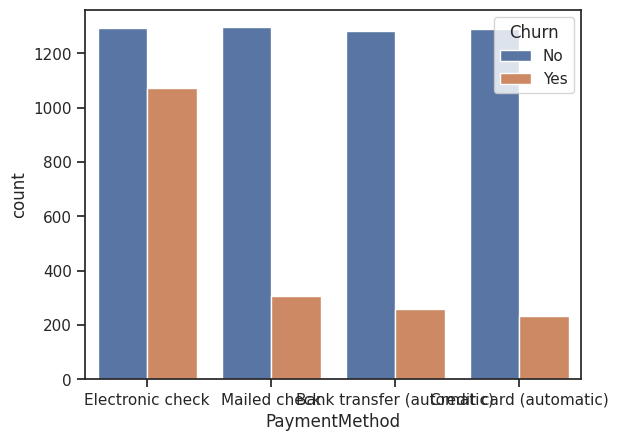

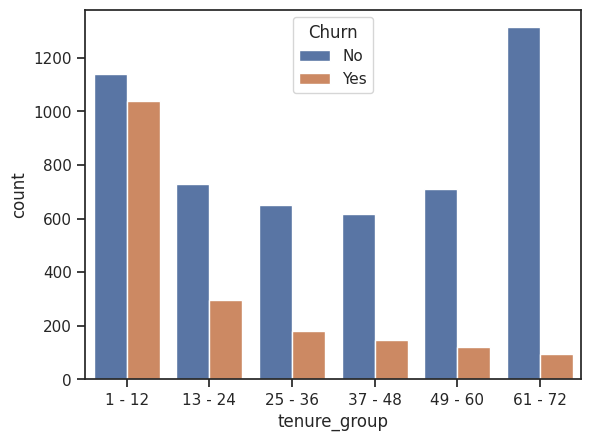

In [ ]:
for i, predictor in enumerate(tel_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=tel_df, x=predictor, hue='Churn')



2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0


In [ ]:
tel_df['Churn'] = np.where(tel_df.Churn == 'Yes',1,0)

In [ ]:
tel_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [ ]:
tel_df.shape

(7032, 20)



3. Convert all the categorical variables into dummy variables


In [ ]:
tel_df_dummies = pd.get_dummies(tel_df)
tel_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0




10. Churn by Monthly Charges and Total Charges


<ipython-input-44-3dd16731f2f1>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(tel_df_dummies.MonthlyCharges[(tel_df_dummies["Churn"] == 0) ],
<ipython-input-44-3dd16731f2f1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(tel_df_dummies.MonthlyCharges[(tel_df_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

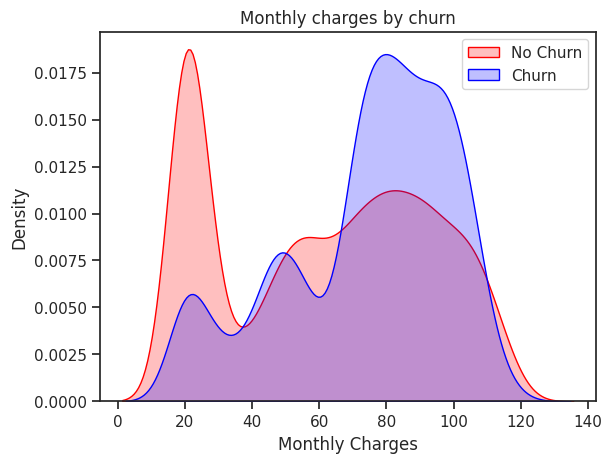

In [ ]:
Mth = sns.kdeplot(tel_df_dummies.MonthlyCharges[(tel_df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(tel_df_dummies.MonthlyCharges[(tel_df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')



Insight: Churn is high when Monthly Charges ar high


<ipython-input-45-7dbe8d672011>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(tel_df_dummies.TotalCharges[(tel_df_dummies["Churn"] == 0) ],
<ipython-input-45-7dbe8d672011>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(tel_df_dummies.TotalCharges[(tel_df_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

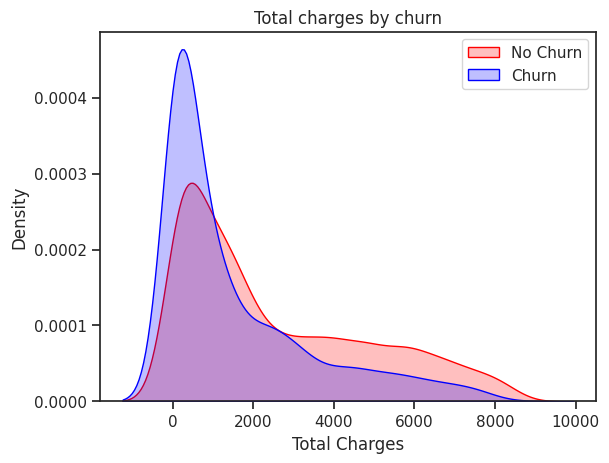

In [ ]:


Tot = sns.kdeplot(tel_df_dummies.TotalCharges[(tel_df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(tel_df_dummies.TotalCharges[(tel_df_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')





Surprising insight as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.




11. Build a corelation of all predictors with 'Churn'


<Axes: >

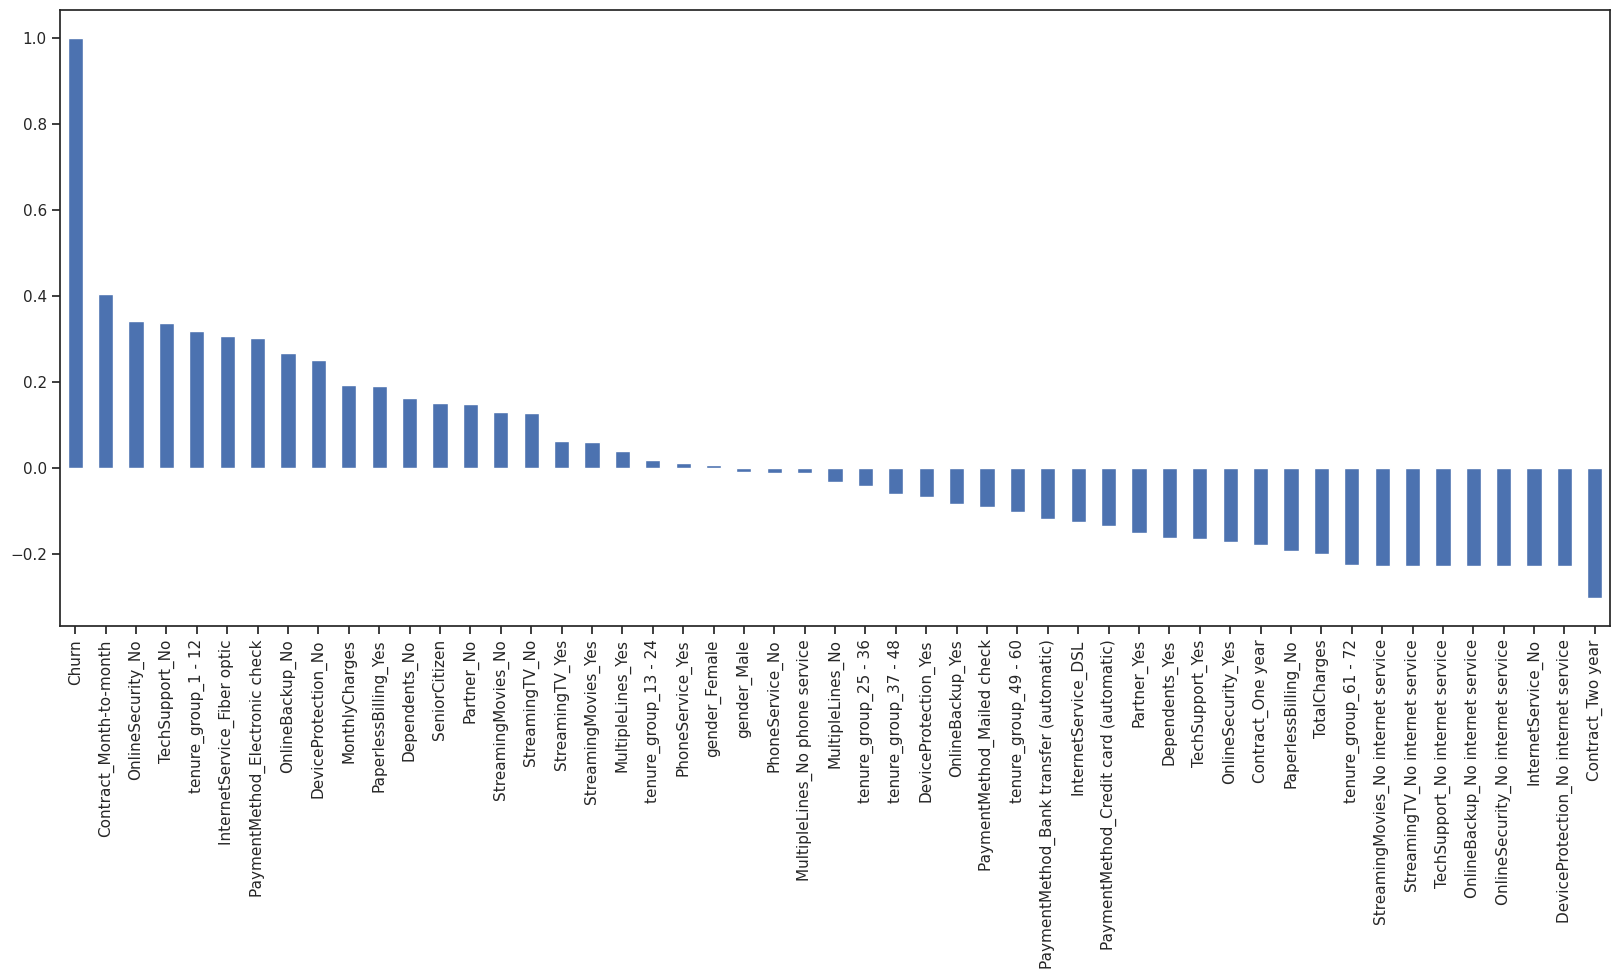

In [ ]:
plt.figure(figsize=(20,8))
tel_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

<Axes: >

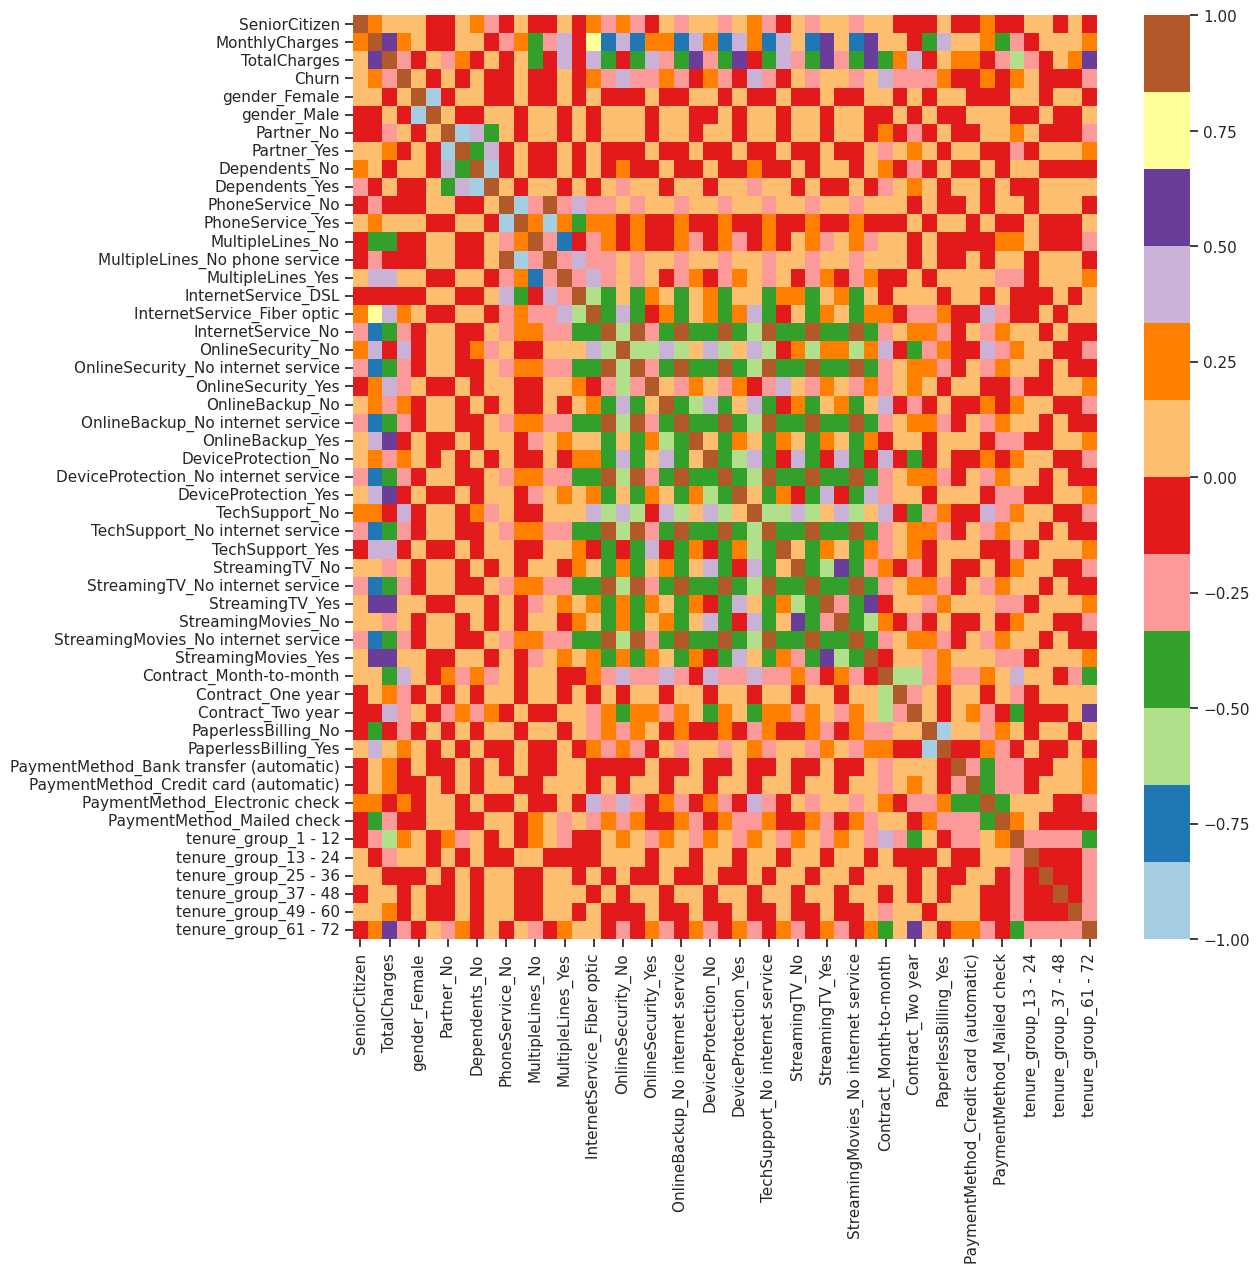

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(tel_df_dummies.corr(), cmap="Paired")




Bivariate Analysis


In [ ]:
new_df1_target0=tel_df.loc[tel_df["Churn"]==0]
new_df1_target1=tel_df.loc[tel_df["Churn"]==1]


In [ ]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    width = len(df[col].unique()) + 7 + 4 * len(df[hue].unique())
    fig, ax = plt.subplots(figsize=(width, 8))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yscale('log')
    ax.set_title(title)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright', ax=ax)

    plt.show()

Explain the function

The uniplot function creates a countplot with specific styling and formatting.
It takes in a DataFrame, a column to plot, a title for the plot, and an optional hue parameter for grouping the data.
It sets the style, context, label size, title size, and title padding for the plot.
The width of the plot is calculated based on the number of unique values in the column and hue.
A figure and axes are created with the specified width and a fixed height of 8 inches.
The x-axis tick labels are rotated by 45 degrees, and the y-axis scale is set to logarithmic.
The provided title is set as the title of the plot.
A countplot is created using the DataFrame, column, order of categories, hue, palette, and axes.
The plot is displayed using plt.show()

<ipython-input-52-28df93b6c24a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


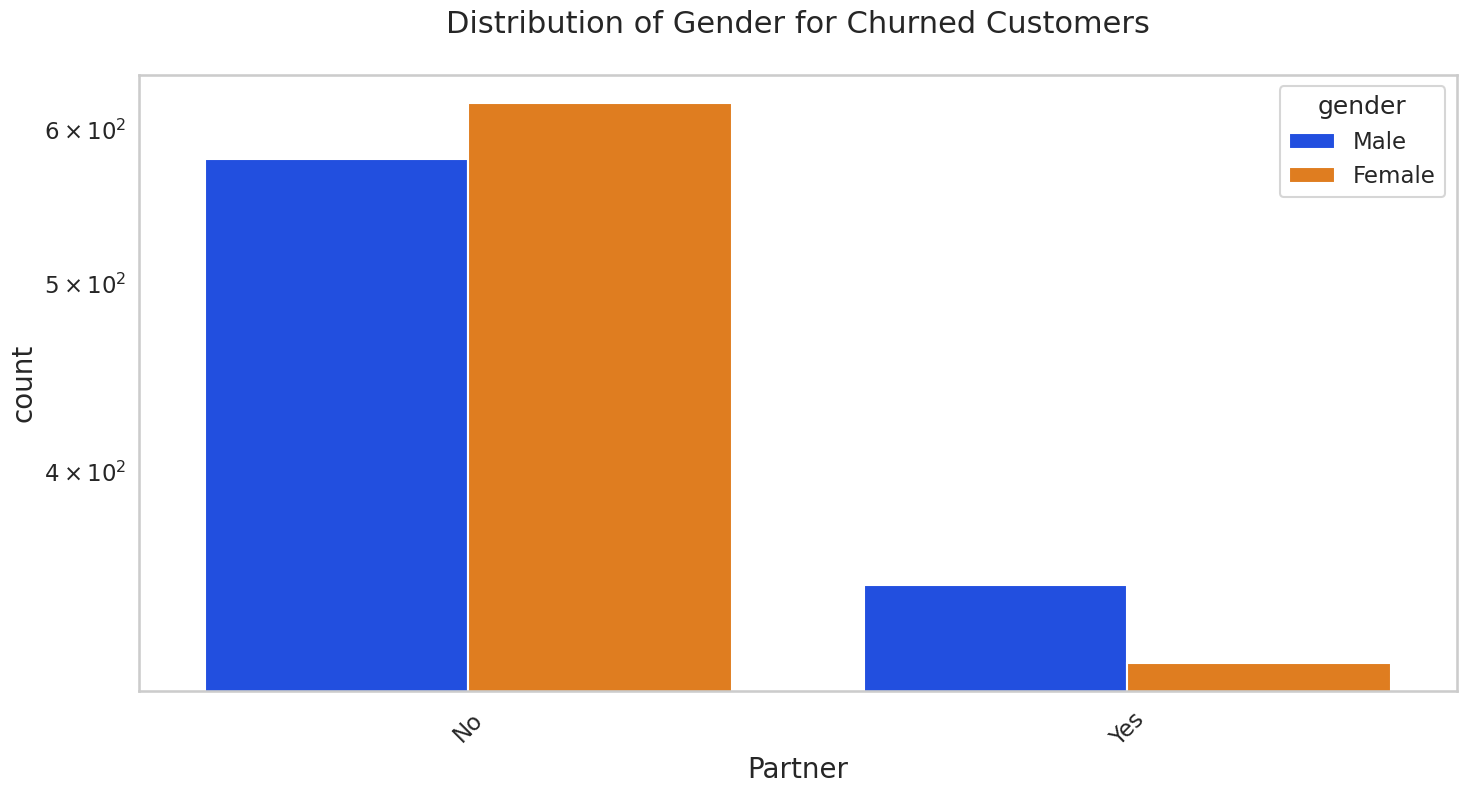

<ipython-input-52-28df93b6c24a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


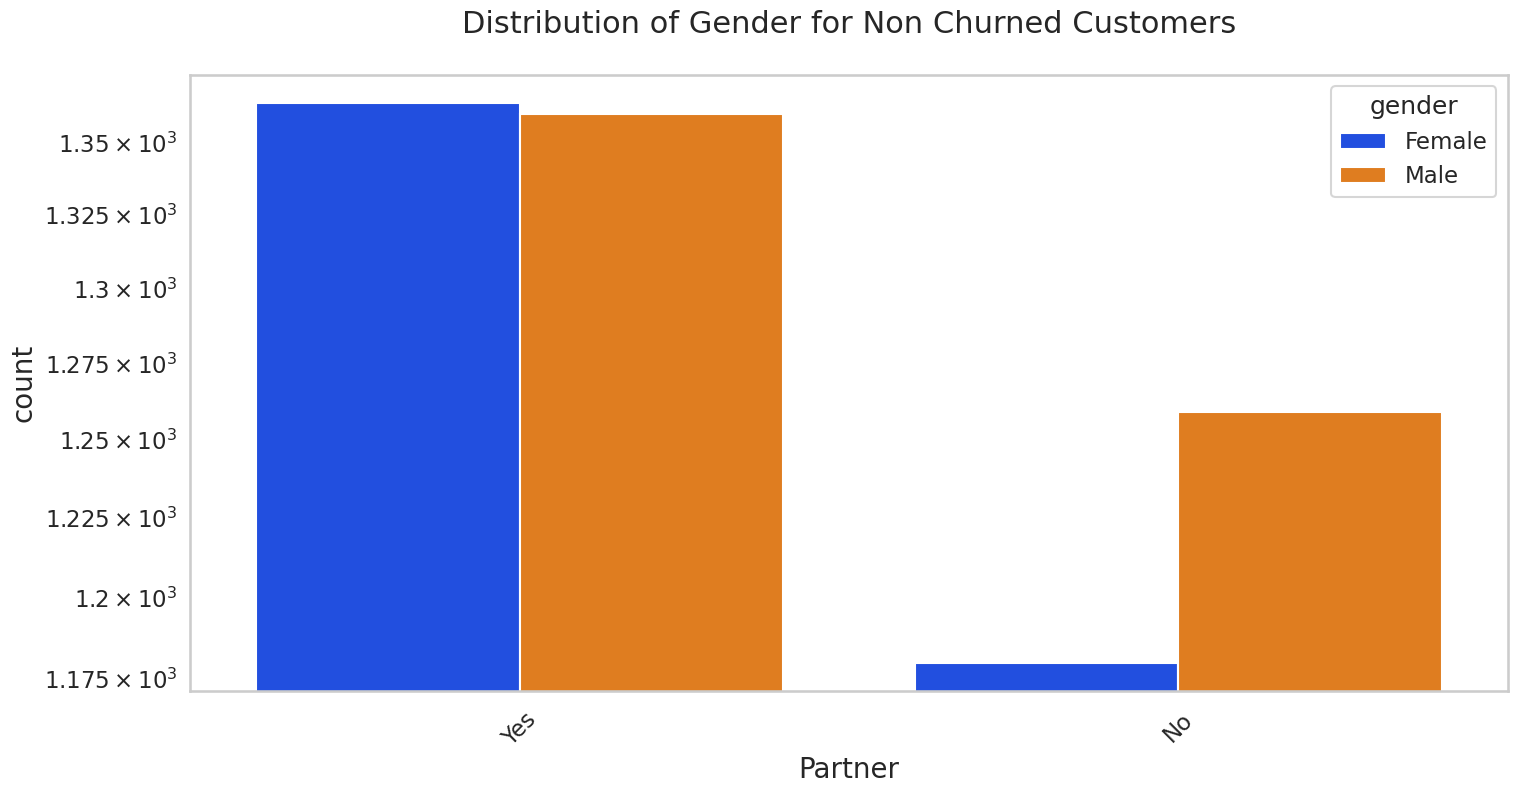

<ipython-input-52-28df93b6c24a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


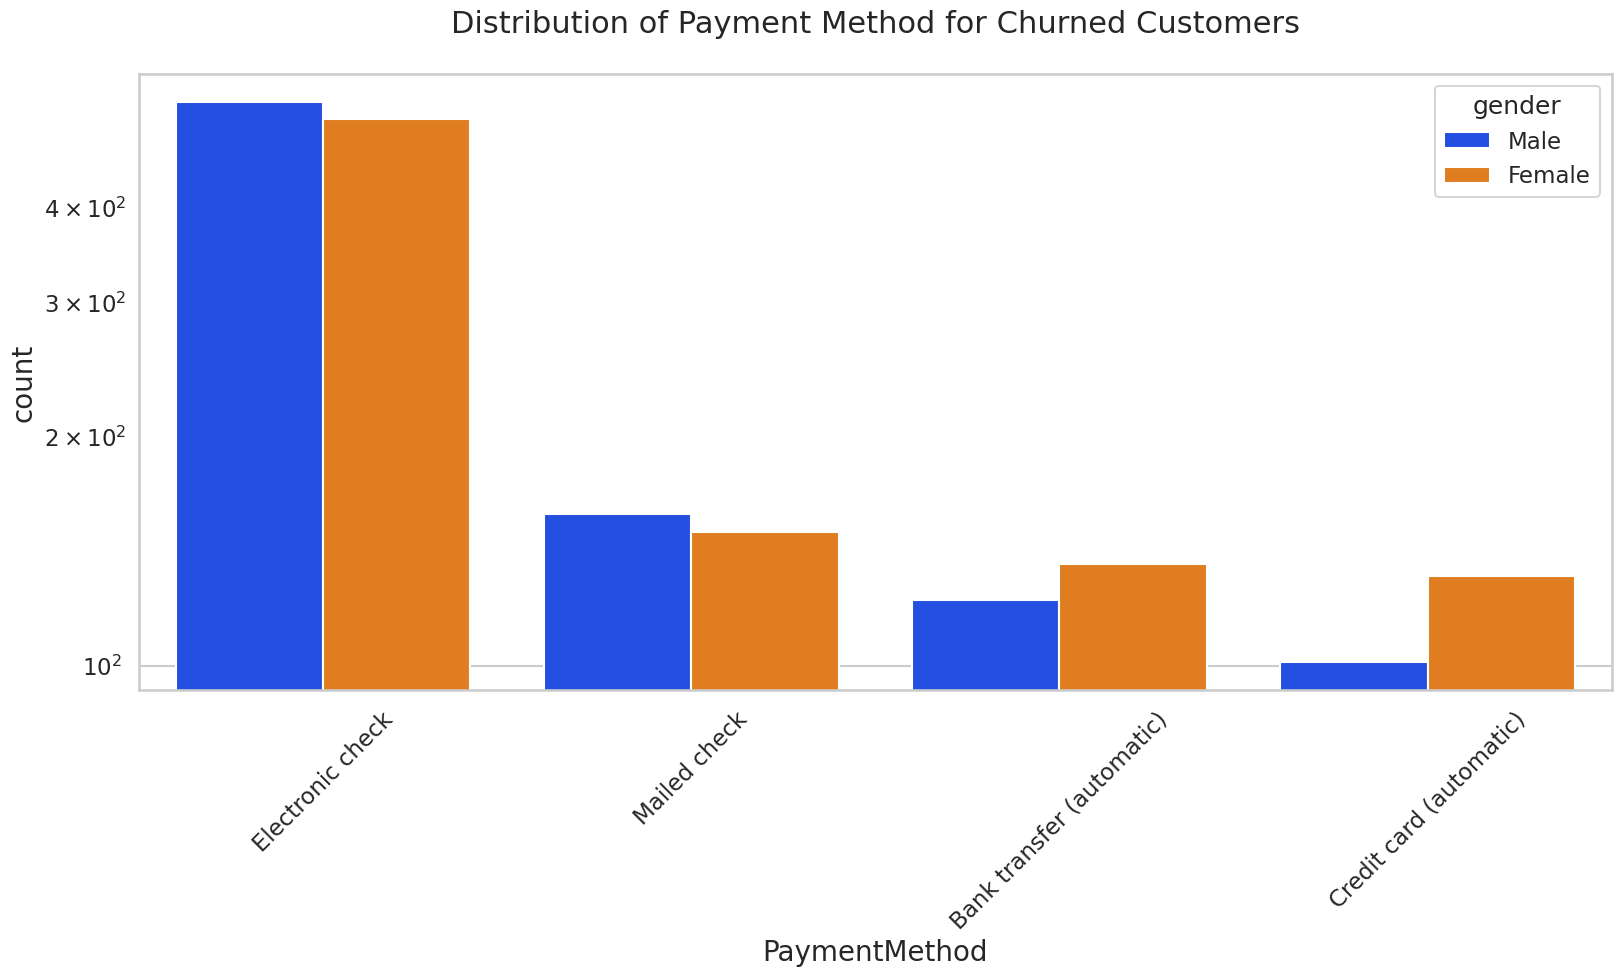

<ipython-input-52-28df93b6c24a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


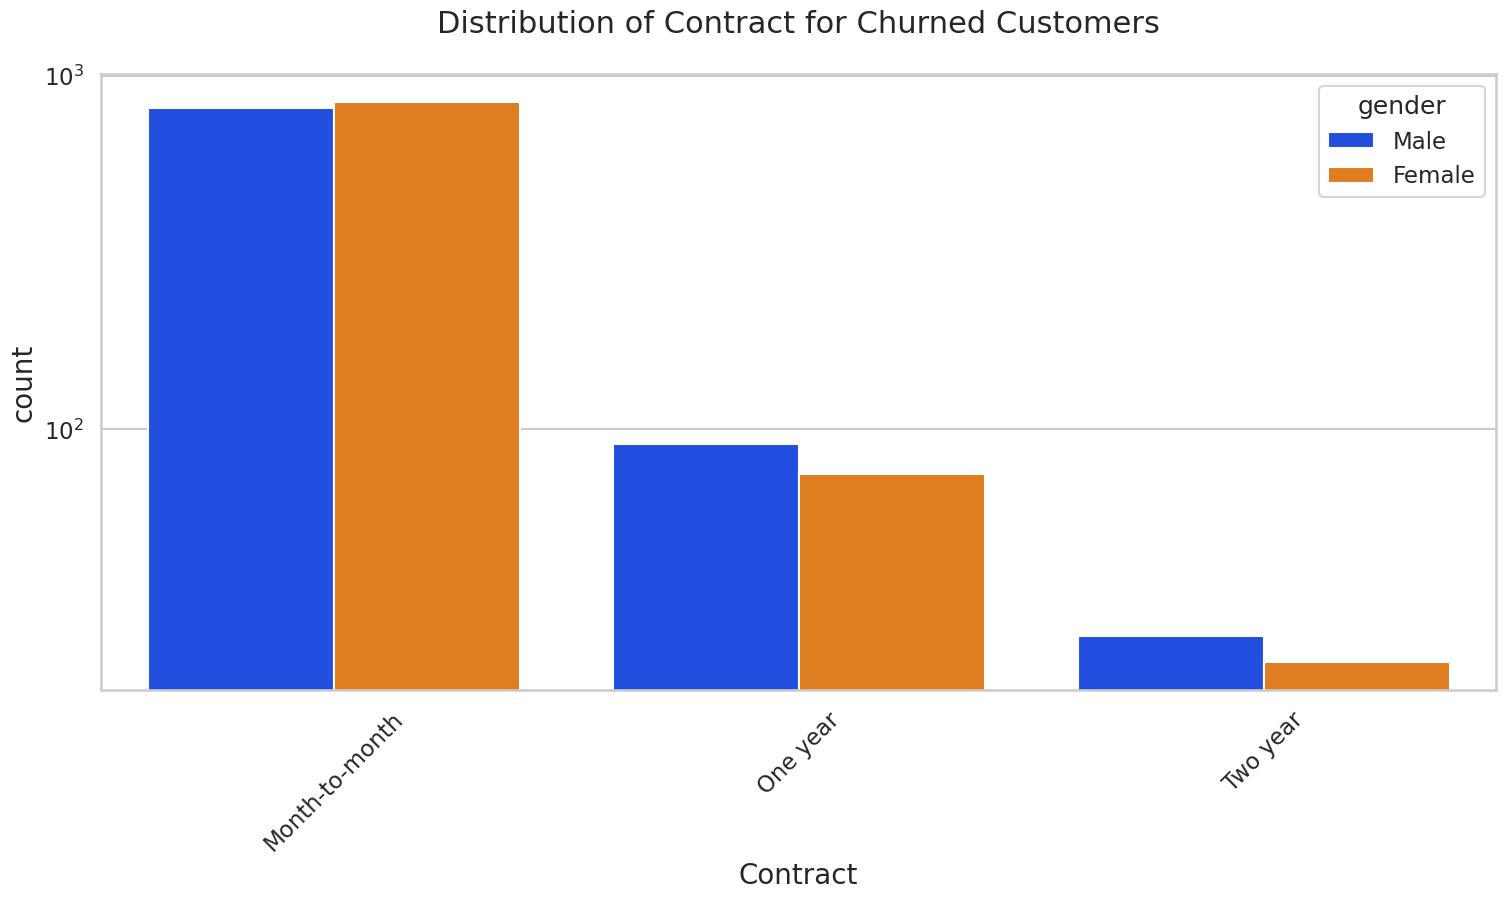

<ipython-input-52-28df93b6c24a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


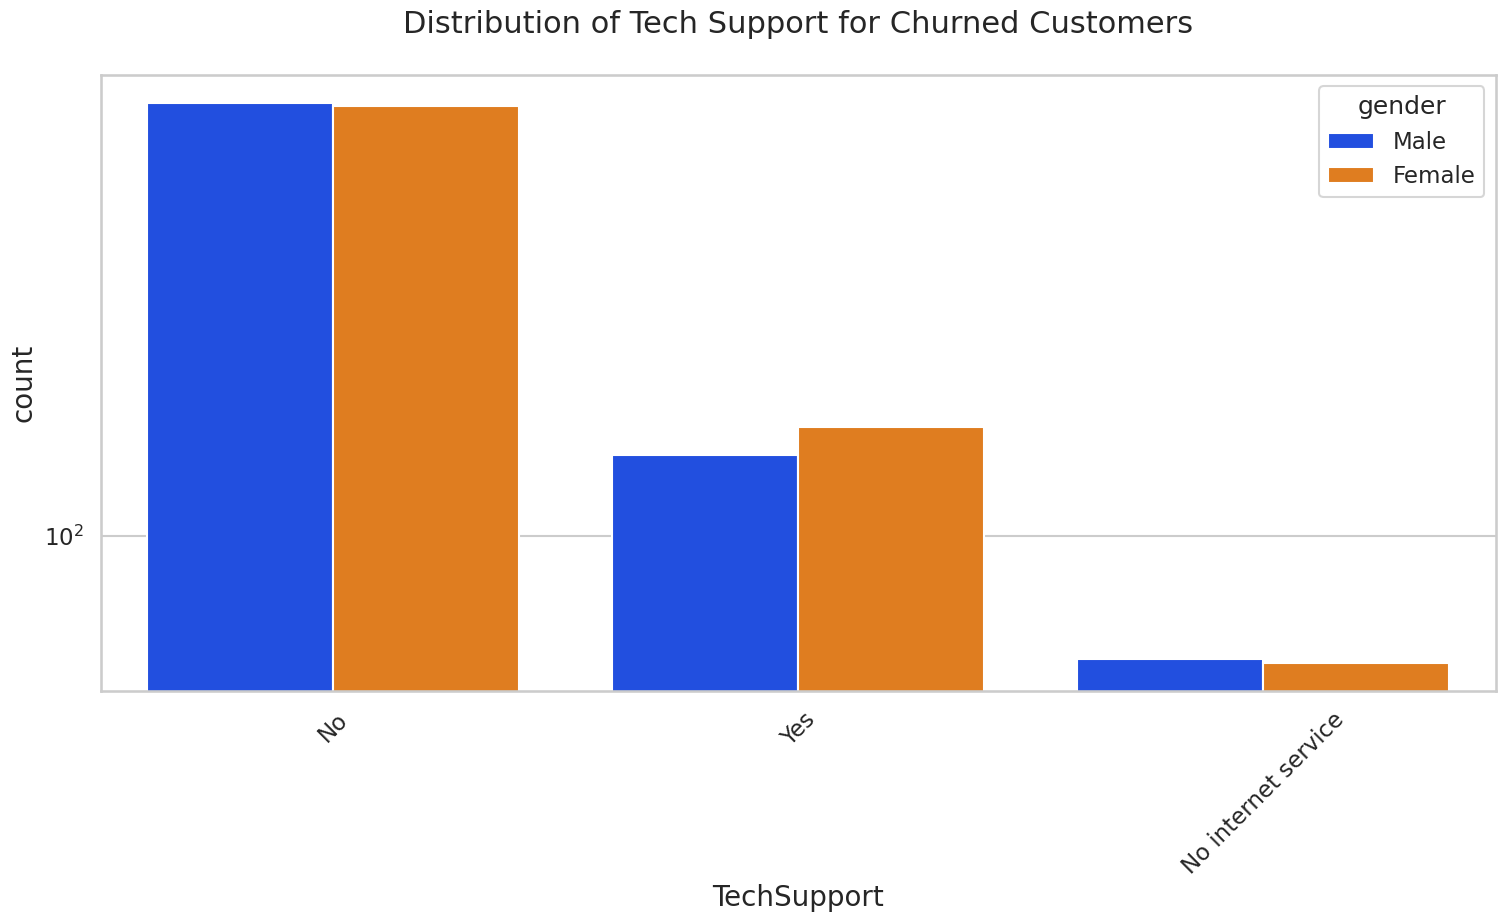

<ipython-input-52-28df93b6c24a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


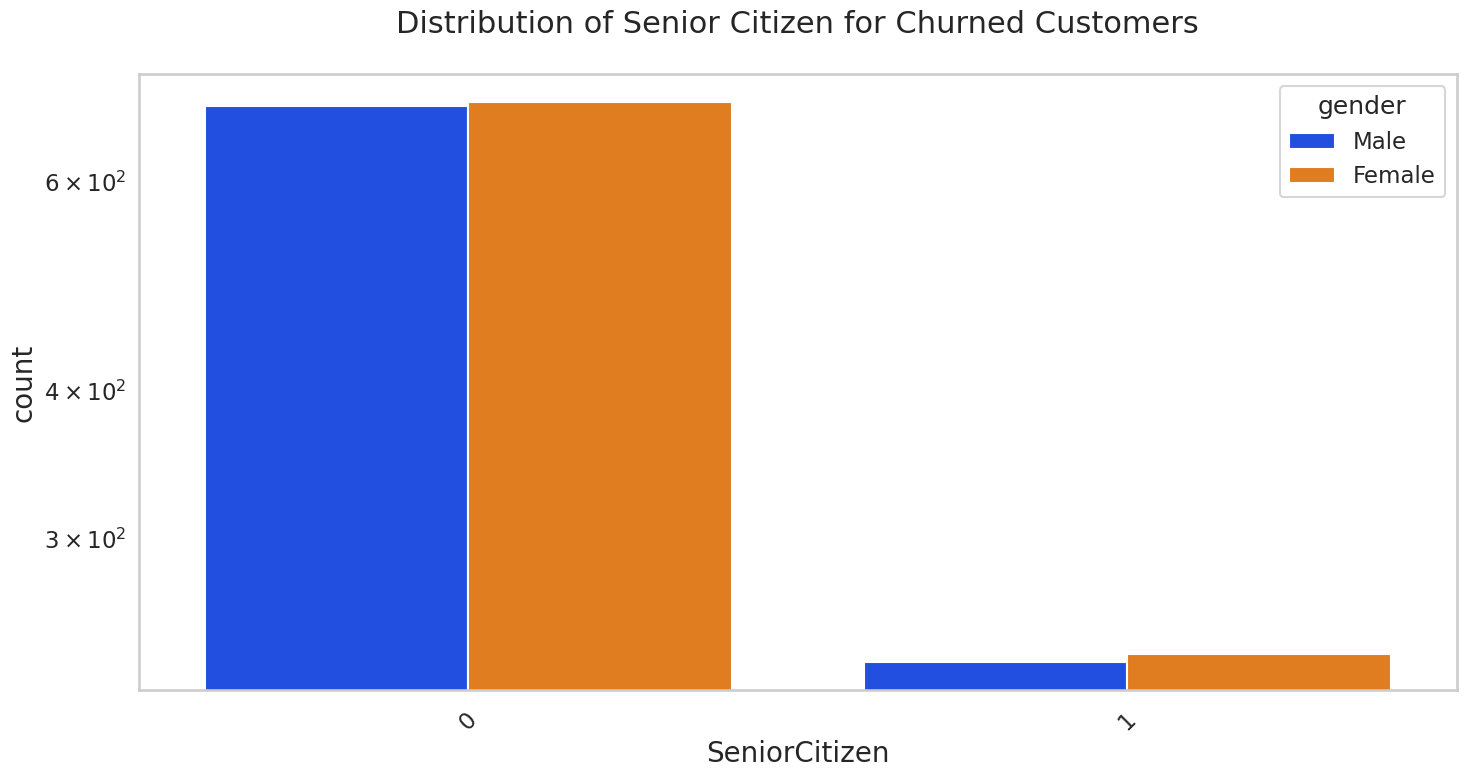

In [ ]:
uniplot(new_df1_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')
uniplot(new_df1_target0, col='Partner', title='Distribution of Gender for Non Churned Customers', hue='gender')
uniplot(new_df1_target1, col='PaymentMethod', title='Distribution of Payment Method for Churned Customers', hue='gender')
uniplot(new_df1_target1, col='Contract', title='Distribution of Contract for Churned Customers', hue='gender')
uniplot(new_df1_target1, col='TechSupport', title='Distribution of Tech Support for Churned Customers', hue='gender')
uniplot(new_df1_target1, col='SeniorCitizen', title='Distribution of Senior Citizen for Churned Customers', hue='gender')


Based on the analysis conducted, several insights can be gleaned from the exercise. Firstly, it was observed that customers using the payment method "Electronic check" exhibited the highest churn rate. This suggests that the payment method may be a contributing factor to customer attrition.

Secondly, customers with a monthly contract type were found to be more prone to churn compared to those with longer contract terms. This can be attributed to the absence of contractual obligations, as monthly customers have the flexibility to terminate their services without any contractual repercussions.

Furthermore, customers who did not have online security or access to technical support were identified as high churners. This highlights the importance of these features in customer retention, as the lack of these services may lead to dissatisfaction and ultimately churn.

Lastly, it was observed that non-senior citizens exhibited higher churn rates compared to senior citizens. While the underlying reasons for this disparity require further investigation, it suggests that age may play a role in customer retention, with younger customers being more likely to churn.

<h3><strong>Building the Model</strong></h3>

In [ ]:
df=tel_df_dummies.copy()

In [ ]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
x=df.drop('Churn',axis=1)
x.head(2)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
x.shape

(7032, 50)

In [ ]:
Y=df['Churn']

In [ ]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
sm = SMOTEENN()
X_SMOTE, y_SMOTE = sm.fit_resample(x, Y)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_SMOTE,y_SMOTE,test_size = 0.2,random_state =0)

In [ ]:
model_decissiontree=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_decissiontree.fit(X_train,y_train)
yr_predict = model_decissiontree.predict(X_test)
model_score_dtree = model_decissiontree.score(X_test, y_test)
print(model_score_dtree )

print(metrics.classification_report(y_test, yr_predict))


0.9219015280135824
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       514
           1       0.93      0.93      0.93       664

    accuracy                           0.92      1178
   macro avg       0.92      0.92      0.92      1178
weighted avg       0.92      0.92      0.92      1178




Random Forest Classifier


In [78]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [79]:
model_rf.fit(X_train,y_train)
yrf_predict = model_rf.predict(X_test)
model_score_r1 = model_rf.score(X_test, y_test)
print(model_score_r1)
print(metrics.classification_report(y_test, yrf_predict))


0.9363327674023769
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       514
           1       0.93      0.96      0.94       664

    accuracy                           0.94      1178
   macro avg       0.94      0.93      0.94      1178
weighted avg       0.94      0.94      0.94      1178



In [81]:
import joblib

# Save the model
joblib.dump(model_rf, 'random_forest_churn_model.pkl')


['random_forest_churn_model.pkl']

In [82]:

# Load the model
model_rf = joblib.load('random_forest_churn_model.pkl')
